# Advanced Project: Long Run

## Implementing the Production Model


In [2]:
# Write the code for the libraries you use to complete the assignment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# The Black Death 

In the middle of the fourteenth century, an epidemic known as the Black Death killed about a third of Europe's population, about 34 million people. This enormous tragedy had macroeconomic consequences: wages were *higher* than before the Black Death over the next century. Questions 1 and 2 will help you understand why this happened.


## Q1) Solving the production model

Before answering any questions about the Black Death, first, understand the production function. Suppose the production function is given by $ Y = \bar{A}K^{\alpha}L^{1-\alpha}$. This specification is a general version of the production function we've been working with, where $\alpha$ is the "capital share of output." 

### The Production Model:

| Description             | Formula                             |
|-------------------------|-------------------------------------|
| Production function     | $Y \text{ = } \bar{A}K^{\alpha}L^{1 - \alpha}$ | 
| Rule for hiring capital | $\alpha\frac{Y}{K}\text{=}r\space$ |
| Rule for hiring labor   | $$ (1-\alpha) \frac{Y}{L} \text{=} \omega$$ |
| Demand $=$ Supply for capital | $K = \bar{K}$ |
| Demand $=$ supply for labor | $L = \bar{L}$ |



**(a)** What is the solution for the equilibrium level of output per person? Let $\bar{A} = 1$, $L = 200$, $K = 200$, $\alpha = 1/3$. 
Do this problem by hand, and input your solution below.



Output: 200.00

r: 0.33

w: 0.67

Supply for Capital: 200

Supply for Labor: 200

Output per person: 1

**(b)** How does changing the level of TFP ($\bar{A}$) affect the equilibrium level of output, rental rate of capital, and wages? Answer this question using Python. 

*Hint: Try defining a vector/array containing a series of values for TFP, i.e. $\bar{A}$=[0.5, 0.75, 1.25, 1.5]. Then let Python do the work and calculate everything for you using functions.

In [4]:
# Defining a function that returns the value of the production function

def cobb_doug(A, K, L, alpha):
    Y = A * pow(K, alpha) * pow(L, 1 - alpha)
    return Y

# Defining variables to then be used in calculations
A = np.array([0.5, 0.75, 1.25, 1.5])
L = 200
K = 200
alpha = 1/3

# Define a function for the MPL
def mpl(alpha, Y, K):
    r = (1 - alpha) * (Y / L)
    return r

# Define a function for the MPK
def mpk(alpha, Y, K):
    r = alpha * (Y / K)
    return r

for i in range(0, 4):
    print("When A = ", A[i])
    Y = cobb_doug(A[i], L, K, alpha)
    print('Output:', '{0:.2f}'.format(Y))

    r = mpk(alpha, Y, K)
    print('r:', '{0:.2f}'.format(r))

    w = mpl(alpha, Y, L)
    print('w:', '{0:.2f}'.format(w), '\n')

When A =  0.5
Output: 100.00
r: 0.17
w: 0.33 

When A =  0.75
Output: 150.00
r: 0.25
w: 0.50 

When A =  1.25
Output: 250.00
r: 0.42
w: 0.83 

When A =  1.5
Output: 300.00
r: 0.50
w: 1.00 



Explain: Total factor productivity is sometimes referred to as productivity. You can see why using your calculations. Increasing TFP increases the marginal products, together, thereby increasing output and output per person.

## Q2) The Black Death and the marginal product of labor

  **(a)** Show numerically how much wages would rise if a third of the population died from disease. Assume that before the black death the model parameters are $\bar{A} = 1$, $L = 200$, $K = 200$, $\alpha = 1/3$, $Y = \bar{A}K^{1/3}L^{2/3}$.

In [4]:
A = 1
L = 200
K = 200
alpha = 1/3

Y = cobb_doug(A, K, L, alpha)
mpl_before = mpl(alpha, Y, L)
print('The inital wage would be: ', '{0:.2f}'.format(mpl_before))

L = 2/3 * L
Y = cobb_doug(A, K, L, alpha)
mpl_after = mpl(alpha, Y, L)
print('The wage after the black plauge would be: ', '{0:.2f}'.format(mpl_after))
print('The difference is: ','{0:.2%}'.format( (mpl_after - mpl_before) / mpl_before))


The inital wage would be:  0.67
The wage after the black plauge would be:  0.76
The difference is:  14.47%


**(b)** Suppose that instead of the black plague there was an alien invasion of Europe that didn't kill anyone, but instead brought in new technology. How much would TFP have to increase to raise wages as much as the black plague? 

In [5]:
A = 1
L = 200
K = 200
alpha = 1/3
wage_black_plague = 0.76 # found it in part a)

# Setting up algorigthm

epsilon = 0.00001 # algorithm stopping tolerance
error = 1 # initial value for the error

while error>epsilon:
    Y = cobb_doug(A, K, L, alpha)
    wage = mpl(alpha, Y, L)
    error=wage_black_plague- wage
    A=A + error*0.01

print('Alien TFP:','{0:.2f}'.format(A) )
print('Wage: ', round(wage, 4))


Alien TFP: 1.14
Wage:  0.76


# Q3) The empirical fit of the production model

The table below reports per capita GDP and capital per person in the year 2014 for 10 countries. __Your task is to fill in the missing columns of the data frame by completing steps a) thorugh d).__

In [8]:
# Run this code to create the data frame!
countries = ['United States', 'Canada', 'France', 'Hong Kong', 'South Korea', 'Indonesia', 'Argentina', 'Mexico', 'Kenya', 'Ethiopia']
capital_per_person1 = [141841, 128667, 162207, 159247, 120472, 41044, 53821, 45039, 4686, 3227]
per_capita_GDP2 = [51895, 43367, 37360, 45095, 34961, 9797, 20074, 15521, 2971, 1505]
capital_per_person3 = [1.0, '', '', '', '', '', '', '', '', '']
per_capita_GDP4 = [1.0, '', '', '', '', '', '', '', '', '']
predicted_y = [1.0, '', '', '', '', '', '', '', '', '']
implied_TFP = [1.0, '', '', '', '', '', '', '', '', '']

df = pd.DataFrame({'Country(0)':countries, 
                   'Capital per person(1)':capital_per_person1, 
                   'Per capita GDP(2)':per_capita_GDP2, 
                   'Capital per person(3)':capital_per_person3, 
                   'Per capita GDP(4)':per_capita_GDP4, 
                   'Predicted y*(5)':predicted_y, 
                   'Implied TFP(6)':implied_TFP}, columns=['Country(0)', 'Capital per person(1)', 'Per capita GDP(2)', 'Capital per person(3)', 'Per capita GDP(4)', 'Predicted y*(5)', 'Implied TFP(6)'])
df


,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1,1,1,1
1,Canada,128667,43367,,,,
2,France,162207,37360,,,,
3,Hong Kong,159247,45095,,,,
4,South Korea,120472,34961,,,,
5,Indonesia,41044,9797,,,,
6,Argentina,53821,20074,,,,
7,Mexico,45039,15521,,,,
8,Kenya,4686,2971,,,,
9,Ethiopia,3227,1505,,,,


**(a)** Given the values in columns 1 and 2 which are in U.S. dollars, fill in columns 3 and 4 which are relative to U.S. values (U.S. = 1). That is, compute per capita GDP and capital per person relative to the U.S. values taking the ratio of each country's value (either Per capita GDP or Capital per Person) to the corresponding US value. 

In [9]:
k_relative=df['Capital per person(1)'] / df['Capital per person(1)'][0]
df['Capital per person(3)'] = k_relative

y_relative=df['Per capita GDP(2)'] / df['Per capita GDP(2)'][0]
df['Per capita GDP(4)']=y_relative


df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1,1
1,Canada,128667,43367,0.907121,0.835668,,
2,France,162207,37360,1.143583,0.719915,,
3,Hong Kong,159247,45095,1.122715,0.868966,,
4,South Korea,120472,34961,0.849345,0.673687,,
5,Indonesia,41044,9797,0.289366,0.188785,,
6,Argentina,53821,20074,0.379446,0.386820,,
7,Mexico,45039,15521,0.317532,0.299085,,
8,Kenya,4686,2971,0.033037,0.057250,,
9,Ethiopia,3227,1505,0.022751,0.029001,,


**(b)** In column 5, use the production model (with $\alpha=1/3$) to compute predicted per capita GDP for each country relative to the United States. Assume $\bar{A}=1$, which implies there are no TFP differences across countries. This implies the production function is $y^\ast = \bar{A}k^{1/3}$.

In [10]:
A = 1
k = df['Capital per person(3)']

# define the intentive form C-D production function
def prod_func(A, k):
    USA_capital = k[0]
    column_5 = (A * pow(k, 1/3)) / (A * pow(k[0], 1/3))
    return column_5

y = prod_func(A, k)

df['Predicted y*(5)'] = y
df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1.000000,1
1,Canada,128667,43367,0.907121,0.835668,0.968029,
2,France,162207,37360,1.143583,0.719915,1.045737,
3,Hong Kong,159247,45095,1.122715,0.868966,1.039337,
4,South Korea,120472,34961,0.849345,0.673687,0.947025,
5,Indonesia,41044,9797,0.289366,0.188785,0.661428,
6,Argentina,53821,20074,0.379446,0.386820,0.723963,
7,Mexico,45039,15521,0.317532,0.299085,0.682227,
8,Kenya,4686,2971,0.033037,0.057250,0.320873,
9,Ethiopia,3227,1505,0.022751,0.029001,0.283356,


**(c)** In column 6, compute the level of TFP that is needed so that the Predicted y* (5) matches Per capital GDP (4)


In [11]:
A=df['Per capita GDP(4)'] / df['Predicted y*(5)']
df['Implied TFP(6)'] = A
df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1.000000,1.000000
1,Canada,128667,43367,0.907121,0.835668,0.968029,0.863268
2,France,162207,37360,1.143583,0.719915,1.045737,0.688428
3,Hong Kong,159247,45095,1.122715,0.868966,1.039337,0.836077
4,South Korea,120472,34961,0.849345,0.673687,0.947025,0.711372
5,Indonesia,41044,9797,0.289366,0.188785,0.661428,0.285420
6,Argentina,53821,20074,0.379446,0.386820,0.723963,0.534308
7,Mexico,45039,15521,0.317532,0.299085,0.682227,0.438395
8,Kenya,4686,2971,0.033037,0.057250,0.320873,0.178420
9,Ethiopia,3227,1505,0.022751,0.029001,0.283356,0.102348


**(d)** Comment on the general results you find.

Column 5 is a fascinating exercise. If each country had the US' TFP, they would have a higher production - much higher than what they have in actuality. 

The implied TFP tells us how far away they are from US productivity levels. Not surprising, developed countries are not that far behind, but developing countries have a long way to go!

As fascinating as that point is, it uncovers a much more important reality. Capital and Labor variation across countries can only explain so much. If most of the variation in GDP per capita is due to variations in TFP, then we have a lot to learn. What is TFP? What causes its variation across countries? How can a government increase it?

All these questions are current topics of research. It's your turn.

## Q4) The labor share and Cobb-Douglas production 

Below is the code to download the FRED `ch04_labor_compensation.csv` file (see 6(a) code comments) for the share of income paid to labor for the nonfarm business sector of the U.S. economy, back to 1950. (For an introduction to FRED, see the case study "The FRED database" in Chapter 2 of your textbook). Press shift + enter to run the code, and then answer the questions underneatch it.

In [7]:
#Press shift + enter to run this code
df = pd.read_csv('https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch04_labor_compensation.csv',
                   header=0, names=['Date', 'Labor Compensation'], index_col = 0) # 'Date' and 'Labor Compensation' are the new column names


**(a)** Create a time series plot of the data you downloaded.

_Hint:  For the plotting consider using the pandas function df.plot where df is the name of your data frame._



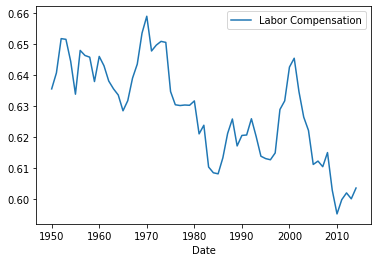

In [8]:
df.index = pd.DatetimeIndex(df.index).year # Converts dd-mm-yyyy dates to yyyy format only.
df.plot()
plt.show()


**(b)** What is the value of the labor share for your most recent data point? 

_Hint: research the function df.iloc[]_

In [18]:
df.iloc[[-1]]

,Labor Compensation
Date,
2014,0.603597


**(c)** What does the data suggest about the validity of our assumptions that the production function is Cobb-Douglas?

The assumption that the labor share is constant is an oversimplification. The data shows more variation than suggested by the model. However, on average, the premise of constant labor share is not too far from reality. In our case, where we are making cross-country comparisons, adding a labor share that changes over time will lead to different yearly estimates for TFP. Unless we aim to get a time series for TFP, I think our development accounting exercise doesn't need to include more than a constant labor share.